### E-Commerce Sales Analysis
This project involves a comprehensive analysis of an e-commerce dataset, with the objective of uncovering key insights and trends in sales performance. 

In [1]:
#Importing the neccessary libaries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the sales datasert
sales_data  = pd.read_excel("ECOMM DATA.xlsx")
sales_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [3]:
#Information about dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [4]:
sales_data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
(sales_data['Postal Code'].isnull().sum() / sales_data.shape[0]) * 100

80.51472021836615

- In the  Ecommerce data only the Column Postal Code has  null  values which is about 80.51% of the data.

In [6]:
#Droping the Postal Code column From the Sales data set, Since it has more null values in it
sales_data.drop(['Postal Code'], axis=1, inplace = True)

In [7]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
sales_data['Row ID'].nunique()

51290

In [9]:
#Droping the row Id                       
sales_data.drop(['Row ID'], axis=1, inplace=True)

In [10]:
sales_data['Customer ID'].nunique()

1590

In [11]:
#Checking for the dupicate row if exits.
sales_data.duplicated().sum()

0

In [12]:
#Dropping some columns which many not useful to the analysis.
sales_data.drop(['Country', 'Order ID', 'Customer Name','Customer ID', 'Product ID','Ship Date',
                ], axis=1, inplace =True)

In [13]:
sales_data.shape

(51290, 16)

The dataset comprises 51,290 entries and 24 columns, capturing various aspects of sales transactions from 2011 to 2014.

##### Data Cleaning and Preparation

###### 1.Initial Data Overview:

- The dataset includes columns like Order ID, Order Date, Ship Date, Customer ID, Product Name, Sales, Quantity, Discount, Profit, and Shipping Cost.
- The Postal Code column, with 80.51% null values, was dropped to maintain data quality.
- The Row ID column, which uniquely identifies each row, was also dropped as it doesn't contribute to the analysis.

###### 2.Data Deduplication:

- No duplicate rows were found.

###### 3. Column Reduction:

- Columns such as Country, Order ID, Customer Name, Customer ID, Product ID, and Ship Date were dropped to streamline the dataset.



#####  Univariate Analysis

In [14]:
#Total sales 
sales_data['Sales'].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

- From  the above we can say that  the average sales was 246.5, minimum was 0.44 and the maximum sales was 22,638.5

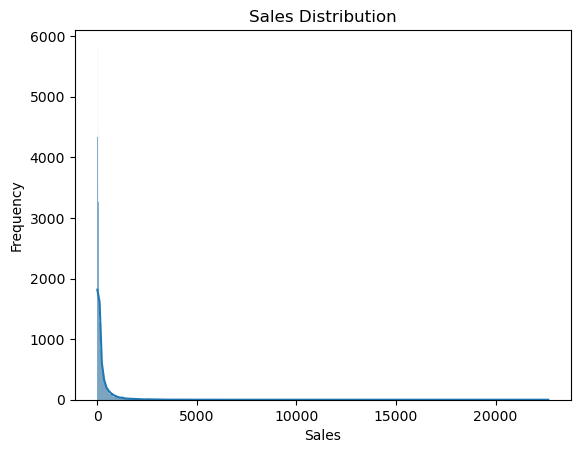

In [15]:
#Sales distribution 
sns.histplot(data=sales_data['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

#### Left Skew plot
- From the above sales plot we cab say that the more sales are occuring in the low price iten and low sales in higher price item.

In [16]:
# Sales Trends
sales_year =  sales_data['Order Date'].dt.year
print(sales_year.value_counts())

Order Date
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64


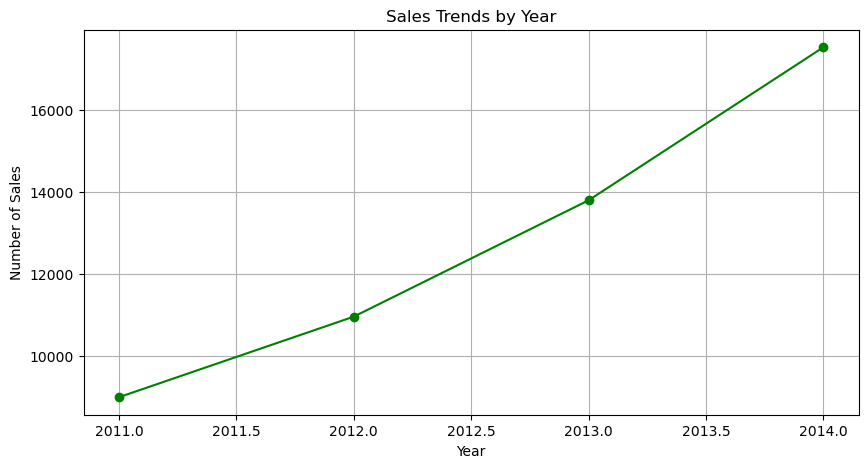

In [17]:
# Plotting sales trends by year
plt.figure(figsize=(10, 5))
sales_year.value_counts().sort_index().plot(kind='line', marker='o', color='g')
plt.title('Sales Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

- We can see that the sales are gradually increase over the year from 2011 to 2014.

In [18]:
sales_month = sales_data['Order Date'].dt.month
print(sales_month.value_counts())

Order Date
11    6342
12    6302
9     5975
6     5331
8     5078
10    4490
5     3747
7     3166
4     3057
3     3035
1     2599
2     2168
Name: count, dtype: int64


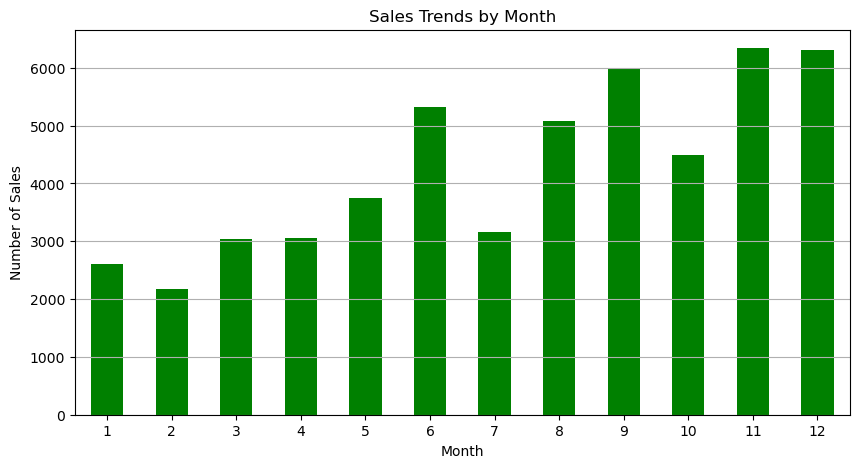

In [19]:
# Plotting sales trends by month
plt.figure(figsize=(10, 5))
sales_month.value_counts().sort_index().plot(kind='bar', color='g')
plt.title('Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- Sales peak in November and December, likely due to holiday shopping, while a dip is observed in the middle months, potentially influenced by summer activities. Overall, sales remain consistent throughout the year, with a slight increase in September, possibly due to back-to-school promotions.

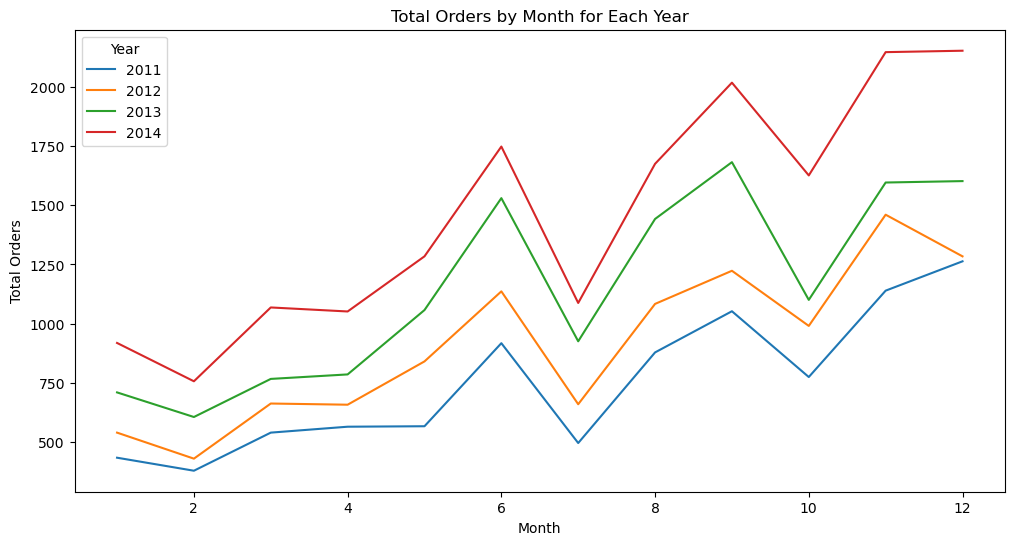

In [20]:
# Extract year and month from 'Order Date' column
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

# Group by year and month, and count the number of orders
monthly_orders = sales_data.groupby(['Year', 'Month']).size().reset_index(name='Total Orders')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each year to plot
for year in monthly_orders['Year'].unique():
    data_year = monthly_orders[monthly_orders['Year'] == year]
    ax.plot(data_year['Month'], data_year['Total Orders'], label=year)


ax.set_xlabel('Month')
ax.set_ylabel('Total Orders')
ax.set_title('Total Orders by Month for Each Year')
ax.legend(title='Year')

plt.show()

- Every year, the trends in sales are nearly the same.

##### Best-Selling Product 

In [21]:
sales_data['Product Name'].value_counts()

Product Name
Staples                                                             227
Cardinal Index Tab, Clear                                            92
Eldon File Cart, Single Width                                        90
Rogers File Cart, Single Width                                       84
Ibico Index Tab, Clear                                               83
                                                                   ... 
Penpower WorldCard Pro Card Scanner                                   1
Cisco SPA525G2 5-Line IP Phone                                        1
Park Ridge Embossed Executive Business Envelopes                      1
Rediform S.O.S. Phone Message Books                                   1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac      1
Name: count, Length: 3788, dtype: int64

In [22]:
sales_data['Product Name'].nunique()

3788

- There are 3788 unquie product among which staples are mostly sellled from year 2011 to 2014.

In [23]:
sales_data['Category'].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

- Office suppiles is the category where more product are selled.

In [24]:
sales_data['Sub-Category'].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

- For the years 2011 through 2014, the most popular subcategory items were binders, while tables were the least popular.

In [25]:
sales_data['Quantity'].describe()

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

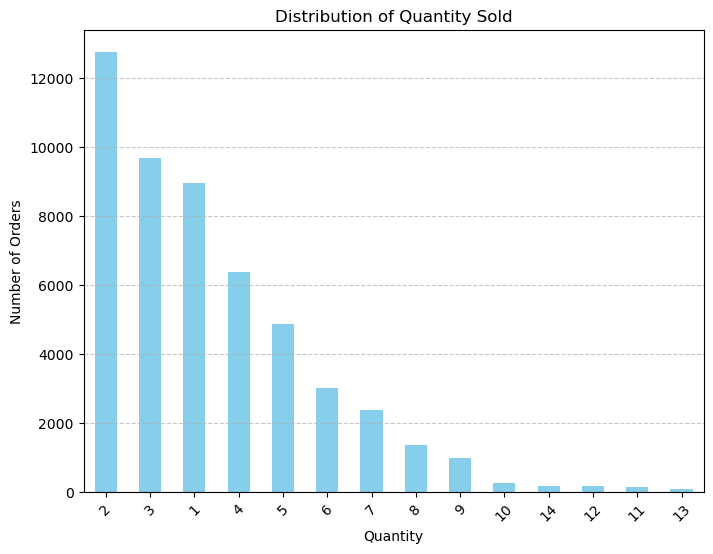

In [26]:
sales_data['Quantity'].value_counts().plot.bar(color='skyblue', figsize=(8, 6))
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.title('Distribution of Quantity Sold')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

- The majority of orders are placed for smaller quantities, and very few for larger ones.

##### Univariate Analysis
###### 1.Sales Distribution:

- The average sales amount is \\$246.5, with a minimum of \\$0.44 and a maximum of \\$22,638.48.
- Sales distribution is left-skewed, indicating higher frequency of lower sales amounts.

###### 2.Yearly Sales Trends:

- Sales increased steadily from 2011 to 2014, with a significant rise in 2014.

###### 3. Monthly Sales Trends:

- Sales peak in November and December, likely due to holiday shopping.
- Monthly sales show a consistent pattern each year with minor variations.

###### 4. Best-Selling Products:

- The most frequently sold product is "Staples", with a predominance of office supplies.
- There are 3,788 unique products, with office supplies being the most common.

###### 5.Category Sales:
- Office Supplies has the highest number of sales transactions.
- Binders are the most sold sub-category, while Tables are the least sold.

#### Bivariate Analysis

In [27]:
#Sales vs. Time Analysis
sales_data.groupby(['Year'])['Sales'].sum()


Year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: Sales, dtype: float64

- The total sales quantity gradually increased from 2011 to 2014.

In [28]:
sales_data.groupby(['Month'])['Sales'].sum()

Month
1     6.751337e+05
2     5.437394e+05
3     7.705009e+05
4     6.985612e+05
5     9.040123e+05
6     1.269717e+06
7     7.493818e+05
8     1.293833e+06
9     1.437380e+06
10    1.168184e+06
11    1.551277e+06
12    1.580781e+06
Name: Sales, dtype: float64

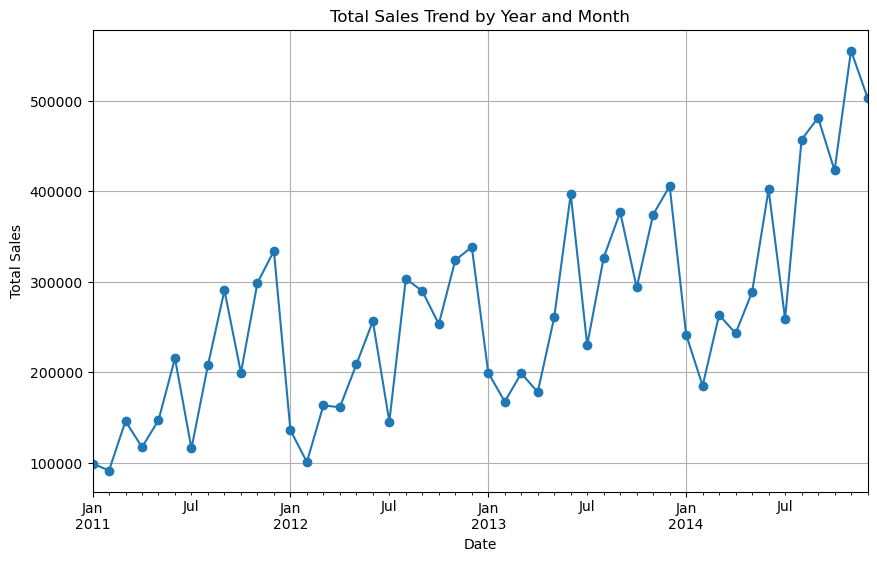

In [29]:
# Group sales data by year and month, and calculate the total sales for each group
monthly_sales = sales_data.groupby(['Year', 'Month'])['Sales'].sum()

# Convert the index to datetime format for plotting
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: '-'.join(map(str, x))))

# Plot total sales vs. time (year and month)
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Trend by Year and Month')
plt.grid(True)
plt.show()

In [30]:
#Sales by Product Category.
sales_data.groupby(['Category'])['Sales'].sum()

Category
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Technology         4.744557e+06
Name: Sales, dtype: float64

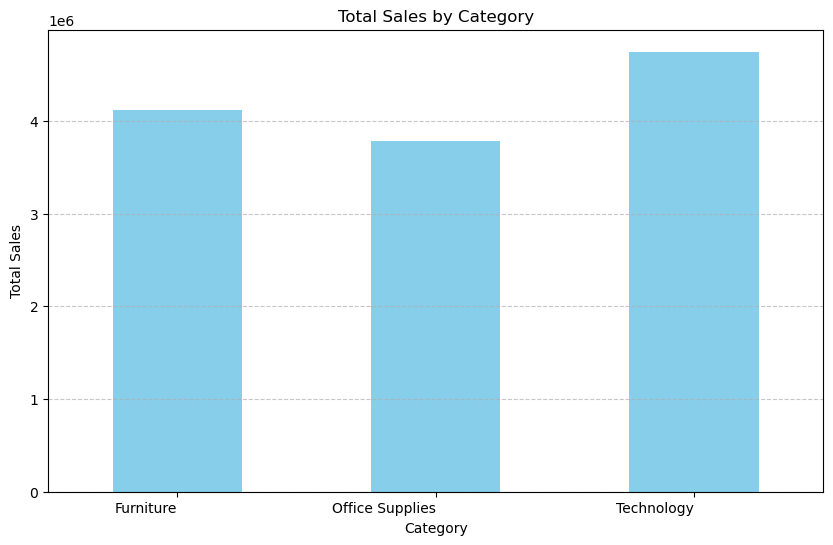

In [31]:
plt.figure(figsize=(10, 6))
sales_data.groupby(['Category'])['Sales'].sum().plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- The largest sales amount came from Technolosy, which was followed by office supplies, furniture, and then office supplies.

In [32]:
#Sales by Customer Segment
sales_data['Segment'].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [33]:
sales_data.groupby(['Segment'])['Sales'].sum()

Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64

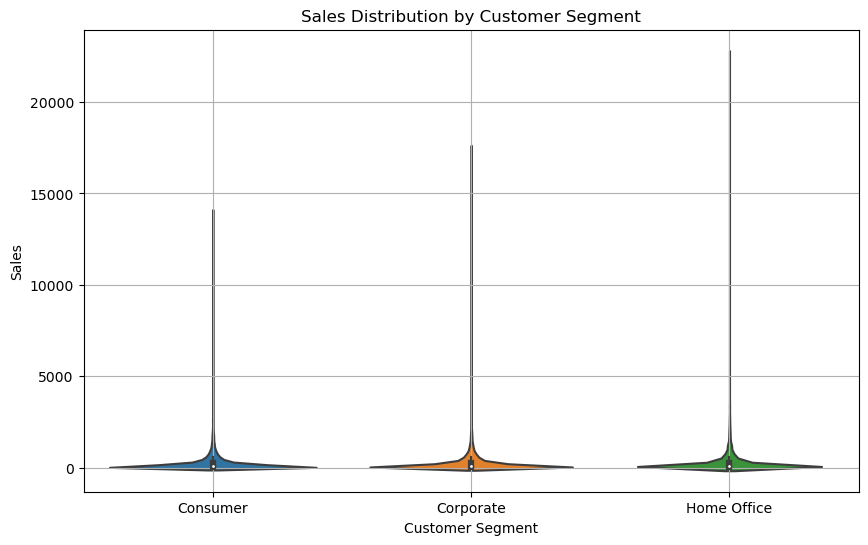

In [34]:
# Create a violin plot to visualize sales distribution by customer segment
plt.figure(figsize=(10, 6))
sns.violinplot(data=sales_data, x='Segment', y='Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.title('Sales Distribution by Customer Segment')
plt.grid(True)
plt.show()

In [35]:
sales_statistics = sales_data.groupby('Segment')['Sales'].describe()
print("Descriptive Statistics for Sales by Customer Segment:")
print(sales_statistics)

Descriptive Statistics for Sales by Customer Segment:
               count        mean         std    min      25%     50%      75%  \
Segment                                                                         
Consumer     26518.0  245.416299  477.132518  0.444  30.6900  85.005  250.992   
Corporate    15429.0  247.890176  486.043062  0.556  31.0800  85.440  252.840   
Home Office   9343.0  247.228403  518.439396  0.990  30.3795  84.600  248.760   

                  max  
Segment                
Consumer     13999.96  
Corporate    17499.95  
Home Office  22638.48  


In [36]:
#Discount vs. Sales
sales_data['Discount'].value_counts(normalize=True)

Discount
0.000    0.565588
0.200    0.097446
0.100    0.079314
0.400    0.061942
0.600    0.039111
0.700    0.034822
0.500    0.031839
0.170    0.014330
0.470    0.014135
0.150    0.010548
0.002    0.008988
0.270    0.007565
0.300    0.006629
0.450    0.006376
0.800    0.006161
0.250    0.003860
0.070    0.002925
0.350    0.002379
0.402    0.002028
0.370    0.001443
0.202    0.000799
0.320    0.000526
0.602    0.000448
0.650    0.000331
0.570    0.000234
0.550    0.000195
0.850    0.000039
Name: proportion, dtype: float64

In [37]:
sales_data['Discount'].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

In [38]:
sales_data.groupby(['Discount'])['Sales'].sum()

Discount
0.000    6.992411e+06
0.002    2.613956e+05
0.070    1.216169e+05
0.100    1.579606e+06
0.150    3.060298e+05
0.170    2.473992e+05
0.200    1.203832e+06
0.202    1.621565e+04
0.250    8.805535e+04
0.270    8.935167e+04
0.300    1.889320e+05
0.320    1.449346e+04
0.350    9.570649e+04
0.370    3.161802e+04
0.400    5.595252e+05
0.402    3.373387e+04
0.450    3.339113e+04
0.470    8.343217e+04
0.500    3.241311e+05
0.550    6.308658e+03
0.570    8.144802e+03
0.600    1.845819e+05
0.602    4.977181e+03
0.650    6.579814e+03
0.700    1.397722e+05
0.800    2.046333e+04
0.850    7.968420e+02
Name: Sales, dtype: float64

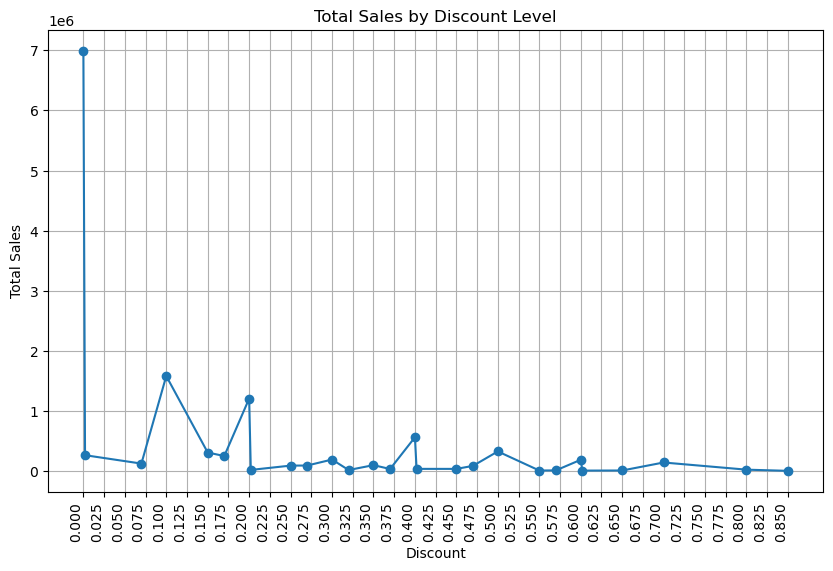

In [39]:
discount_sales = sales_data.groupby('Discount')['Sales'].sum()

# Plot total sales for each discount level
plt.figure(figsize=(10, 6))
plt.plot(discount_sales.index, discount_sales.values, marker='o', linestyle='-')
plt.xlabel('Discount')
plt.ylabel('Total Sales')
plt.title('Total Sales by Discount Level')
plt.grid(True)
plt.xticks(rotation=90, ha='right')
custom_ticks = np.arange(min(discount_sales.index), max(discount_sales.index) + 0.025, 0.025)
plt.xticks(custom_ticks)
plt.show()

##### Bivariate Analysis
###### 1.Sales vs. Time:

- Annual sales show a steady increase, with the highest sales in 2014.
- Monthly sales confirm higher sales at the end of the year.

###### 2.Sales by Product Category:

- Technology products generate the highest revenue, followed by furniture and office supplies.
- Sales distribution shows distinct peaks for each category.

###### 3.Sales by Customer Segment:

- The Consumer segment contributes the most to sales, followed by Corporate and Home Office.
- Violin plots reveal the distribution of sales within each segment, highlighting a similar pattern across segments.

##### Multivariate Analysis

In [40]:
#Sales by Region and Product Category
sales_by_region_category = sales_data.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

In [41]:
sales_by_region_category

,Region,Category,Sales
0,Africa,Furniture,1.946506e+05
1,Africa,Office Supplies,2.667555e+05
2,Africa,Technology,3.223670e+05
3,Canada,Furniture,1.059528e+04
4,Canada,Office Supplies,3.003408e+04
5,Canada,Technology,2.629881e+04
6,Caribbean,Furniture,1.183724e+05
7,Caribbean,Office Supplies,8.957542e+04
8,Caribbean,Technology,1.163330e+05
9,Central,Furniture,8.604176e+05


In [42]:
pivot_table_sales = pd.pivot_table(sales_by_region_category, values='Sales', index='Region', columns='Category', aggfunc='sum')
pivot_table_sales

Category,Furniture,Office Supplies,Technology
Region,,,
Africa,194650.6350,266755.5330,3.223670e+05
Canada,10595.2800,30034.0800,2.629881e+04
Caribbean,118372.4000,89575.4160,1.163330e+05
Central,860417.5833,923435.2760,1.038450e+06
Central Asia,284362.9020,162766.3500,3.056973e+05
EMEA,228620.7360,276685.9920,3.008546e+05
East,208291.2040,205516.0550,2.649740e+05
North,377629.9180,374733.4530,4.958022e+05
North Asia,335716.4610,198554.7750,3.140385e+05


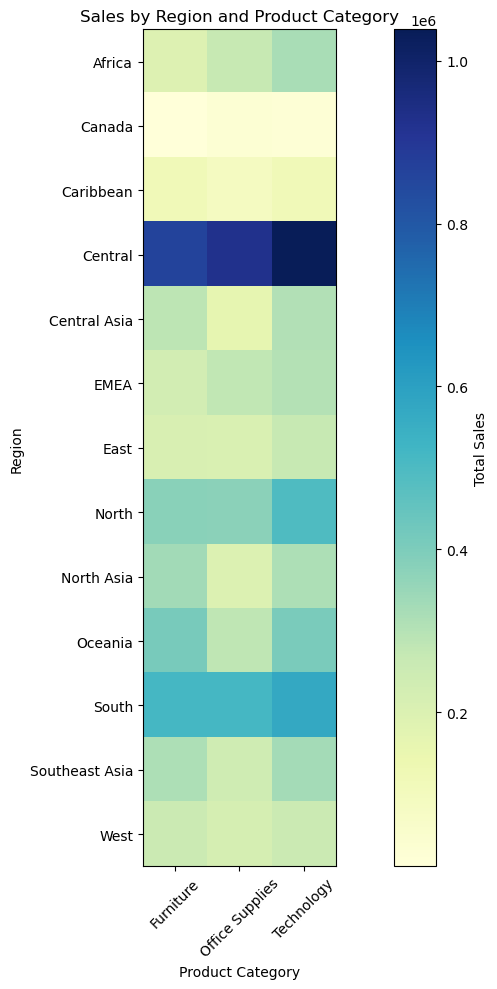

In [43]:
# Plot the pivot table as a heatmap
plt.figure(figsize=(12, 10))
plt.imshow(pivot_table_sales, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Total Sales')
plt.title('Sales by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.xticks(ticks=range(len(pivot_table_sales.columns)), labels=pivot_table_sales.columns, rotation=45)
plt.yticks(ticks=range(len(pivot_table_sales.index)), labels=pivot_table_sales.index)
plt.tight_layout()
plt.show()

In [44]:
#Sales by Customer Segment and Ship Mode
sales_by_segment_shipmode = sales_data.groupby(['Segment', 'Ship Mode'])['Sales'].sum().reset_index()
sales_by_segment_shipmode

,Segment,Ship Mode,Sales
0,Consumer,First Class,9.600463e+05
1,Consumer,Same Day,3.402229e+05
2,Consumer,Second Class,1.285363e+06
3,Consumer,Standard Class,3.922317e+06
4,Corporate,First Class,5.507623e+05
5,Corporate,Same Day,2.011091e+05
6,Corporate,Second Class,8.125649e+05
7,Corporate,Standard Class,2.260261e+06
8,Home Office,First Class,3.201675e+05
9,Home Office,Same Day,1.258700e+05


In [45]:
pivot_table_sales = pd.pivot_table(sales_by_segment_shipmode, values='Sales', 
                                   index='Segment', columns='Ship Mode', aggfunc='sum')

pivot_table_sales

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,960046.34924,340222.9087,1.285363e+06,3.922317e+06
Corporate,550762.28270,201109.0600,8.125649e+05,2.260261e+06
Home Office,320167.50626,125870.0152,4.677440e+05,1.396073e+06


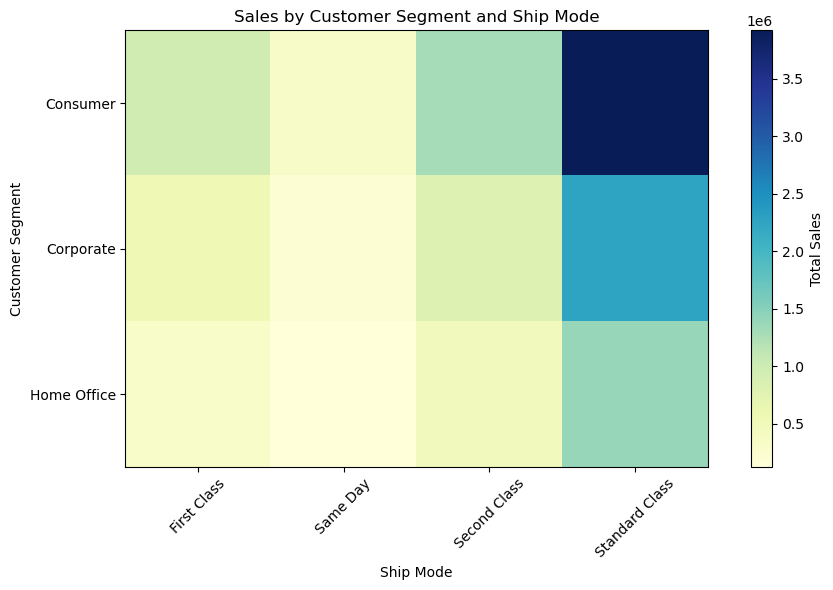

In [46]:
# Plot the pivot table as a heatmap with annotated values
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table_sales, cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Total Sales')
plt.title('Sales by Customer Segment and Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Customer Segment')
plt.xticks(ticks=range(len(pivot_table_sales.columns)), labels=pivot_table_sales.columns, rotation=45)
plt.yticks(ticks=range(len(pivot_table_sales.index)), labels=pivot_table_sales.index)
plt.tight_layout()
plt.show()

In [47]:
#Profitability Analysis
profit_by_category = sales_data.groupby('Category')['Profit'].sum()
profit_by_category


Category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: Profit, dtype: float64

In [48]:
sales_by_category = sales_data.groupby('Category')['Sales'].sum()
sales_by_category

Category
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Technology         4.744557e+06
Name: Sales, dtype: float64

In [49]:
profit_margin = (profit_by_category / sales_by_category) * 100
profit_margin

Category
Furniture           6.937812
Office Supplies    13.690632
Technology         13.990319
dtype: float64

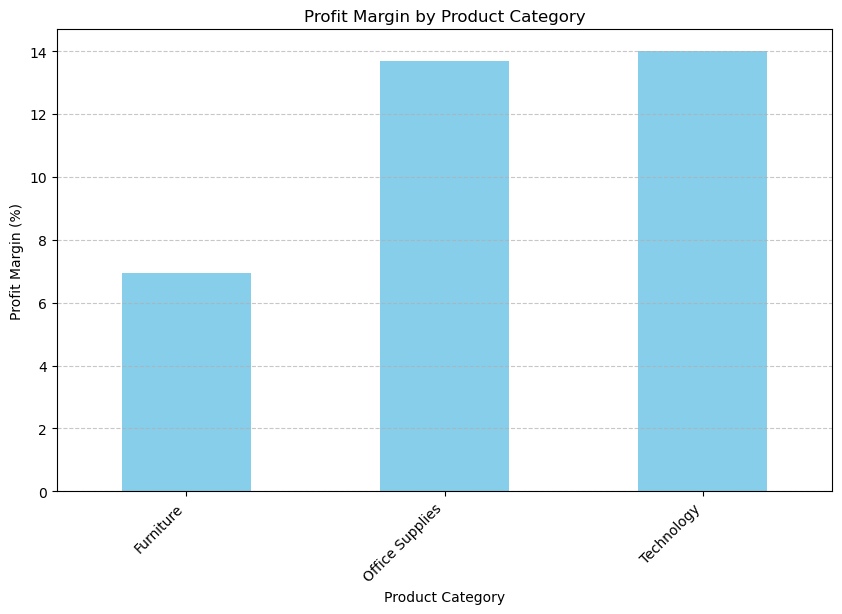

In [50]:
# Plot profit margin for each product category
plt.figure(figsize=(10, 6))
profit_margin.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Multivariate Analysis
###### 1.Sales by Region and Product Category:

- Central and Oceania regions have the highest sales across all product categories.
- A pivot table and heatmap visualize total sales by region and category, showing significant variations.

###### 2.Sales by Customer Segment and Ship Mode:

- Standard Class shipping mode is the most common across all customer segments.
- The Consumer segment prefers Standard Class, with significant sales also in First Class and Second Class shipping modes.
- Heatmap visualization provides a clear comparison of sales by segment and shipping mode.